> # **Lasso Regularization**
> `Least Absolute Shrinkage and Selection Operator Regression` (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the `ℓ1 norm` of the weight vector instead of half the square of the ℓ2norm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

<hr>

> ### Lasso Regularization on `2D data`
> `Hyperparameters`:
> - alpha
> - fit_intercept
> - tol - tolerance of coef
> - max_iter = GD

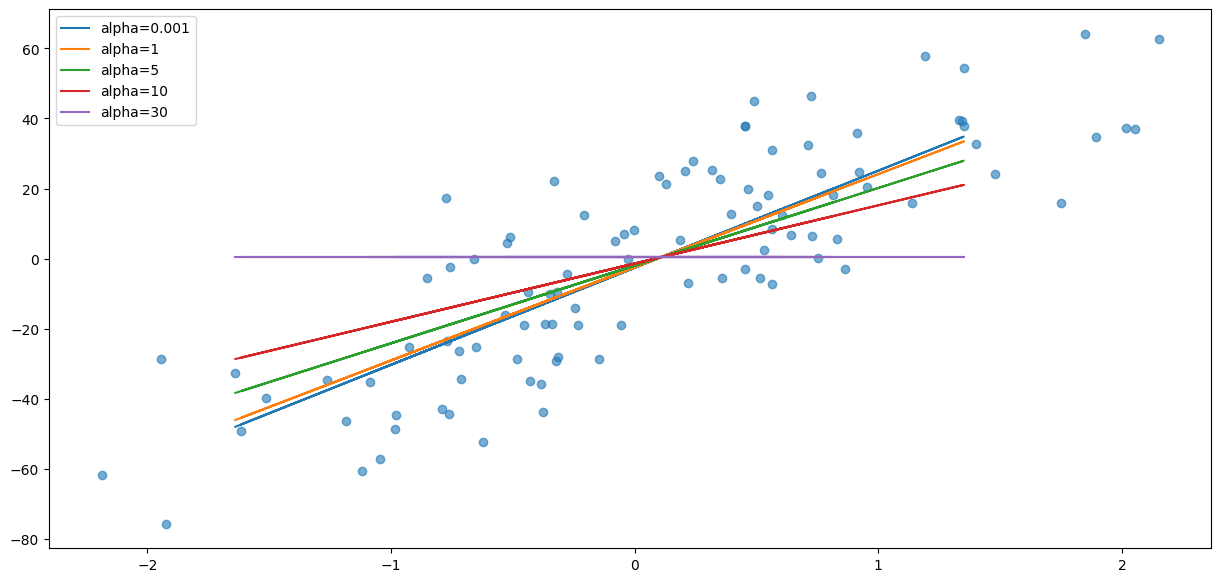

In [5]:
alphas = [0.001,1,5,10,30]
plt.figure(figsize=(15,7))
plt.scatter(X,y, alpha=0.6)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show() 

<hr>

> ### Lasso using `Gradient Descent`
> 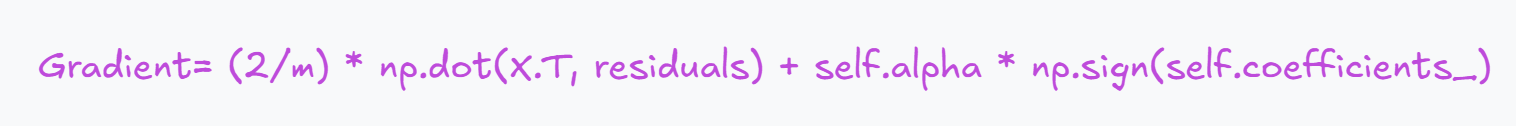
> `Sparcity`: You have to change the formula according to the sign of coefficients. Usually, `Lasso - sklearn class` stops when there is a shift of sign of coefficients for positive to negative and vice-verca

In [7]:
class LassoRegression:
    def __init__(self, alpha=1.0, learning_rate=0.01, n_iterations=1000):
        """
        Initialize the Lasso Regression model.

        Parameters:
        - alpha: Regularization strength; must be a positive float. Larger values specify stronger regularization.
        - learning_rate: The step size for gradient descent.
        - n_iterations: The number of iterations for gradient descent.
        """
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.coefficients_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Fit the Lasso Regression model to the data.

        Parameters:
        - X: Training data (n_samples x n_features).
        - y: Target values (n_samples,).
        """
        # Initialize parameters
        self.coefficients_ = np.zeros(X.shape[1])
        self.intercept_ = 0

        # Gradient Descent
        m = X.shape[0]  # Number of samples
        for _ in range(self.n_iterations):
            # Compute predictions
            predictions = np.dot(X, self.coefficients_) + self.intercept_

            # Compute gradients
            residuals = predictions - y
            gradient_coefficients = (2/m) * np.dot(X.T, residuals) + self.alpha * np.sign(self.coefficients_) # Sparcity case not handled
            gradient_intercept = (2/m) * np.sum(residuals)
            
            # Update coefficients
            self.coefficients_ -= self.learning_rate * gradient_coefficients
            self.intercept_ -= self.learning_rate * gradient_intercept

    def predict(self, X):
        """
        Predict using the Lasso Regression model.

        Parameters:
        - X: Data for prediction (n_samples x n_features).
        
        Returns:
        - Predicted values (n_samples,).
        """
        return np.dot(X, self.coefficients_) + self.intercept_

    def get_params(self):
        """
        Get the parameters of the model.

        Returns:
        - coefficients_: Coefficients of the model.
        - intercept_: Intercept of the model.
        """
        return self.coefficients_, self.intercept_

In [19]:
model = LassoRegression(alpha=0.01, learning_rate=0.1, n_iterations=5000)
model.fit(X_train, y_train)
model.get_params()

(array([27.70794335]), -2.6074535438980857)

In [20]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.7481343092103222

In [25]:
model = SGDRegressor(penalty='l1', loss="squared_error", alpha=0.01, eta0=0.001, max_iter=5000, n_iter_no_change=500)
model.fit(X_train, y_train)

SGDRegressor(alpha=0.01, eta0=0.001, max_iter=5000, n_iter_no_change=500,
             penalty='l1')

In [26]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.7481580078864885

<hr>

> ### Lasso Regularization on `Polynomial Data`

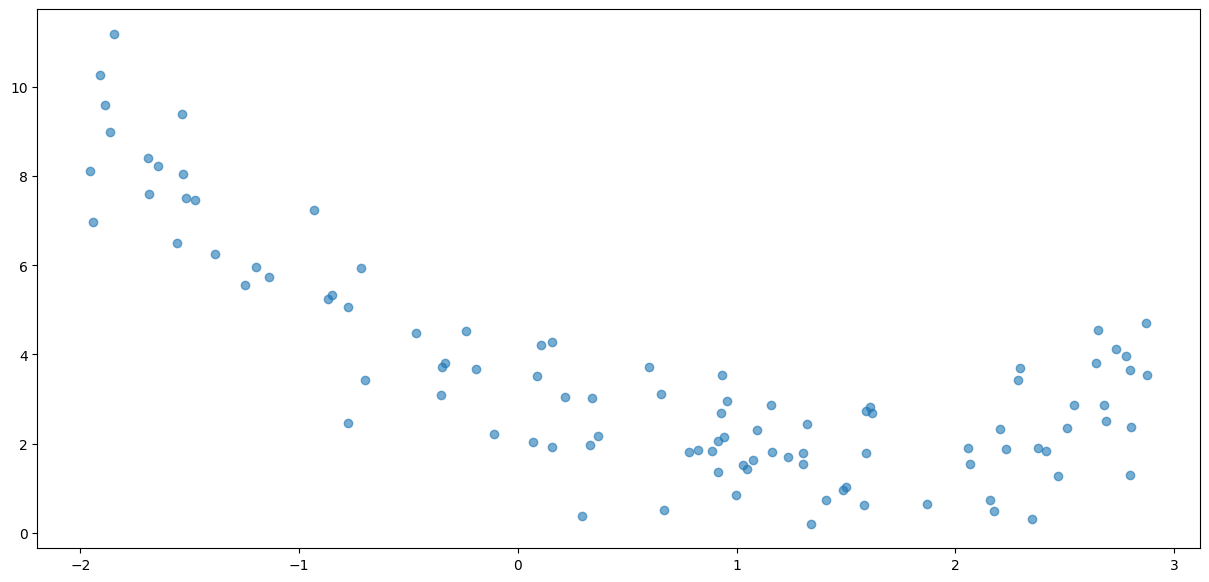

In [27]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)
plt.figure(figsize=(15, 7))
plt.scatter(x1, x2, alpha=0.6)
plt.show()

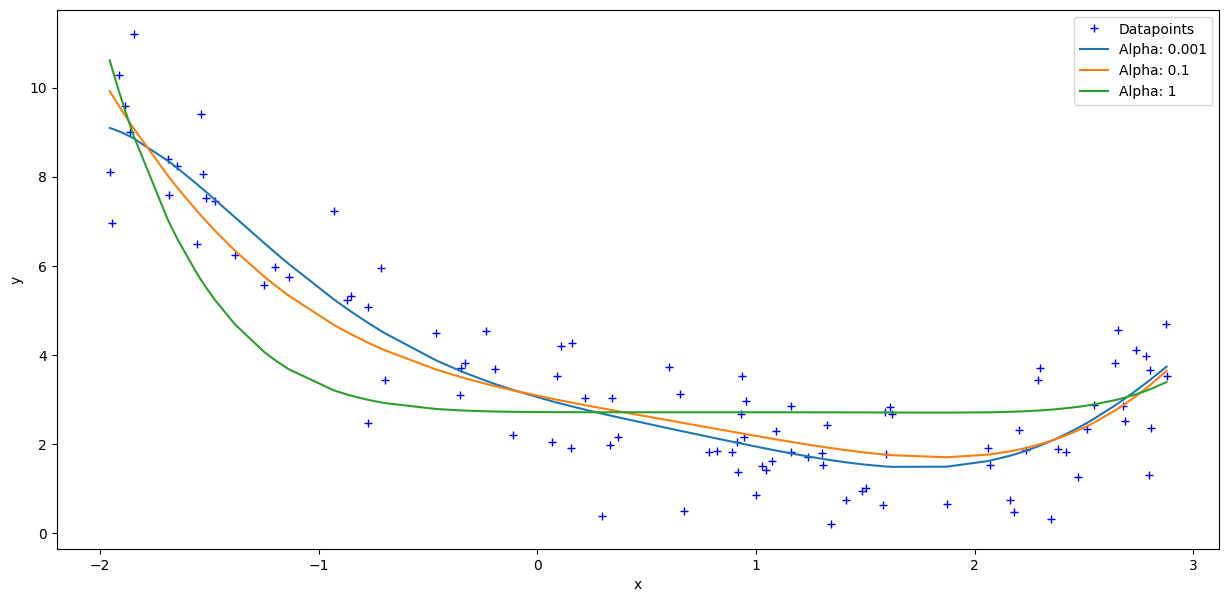

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('std', StandardScaler()),
        ('poly_feats', PolynomialFeatures(degree=6)),
        ('lasso', Lasso(alpha=alpha, max_iter=5000, fit_intercept=True, random_state=42, ))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0.001, 0.1, 1]

plt.figure(figsize=(15, 7))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha in alphas:
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], label='Alpha: {}'.format(alpha))

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()